<a href="https://colab.research.google.com/github/dynamo63/machine-learning-from-scratch/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Linear Regression

Linear regression is a machine learning algorithm used to predict a continous value ( we are in supervised learning).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get Dataset


In [35]:
data = pd.read_json("./sample_data/anscombe.json")
data.drop('Series', axis=1, inplace=True)
data

,X,Y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.81


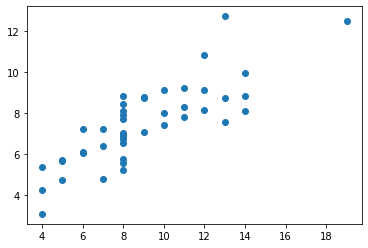

In [11]:
plt.scatter(data['X'], data['Y'])

In [12]:
# Always verify matrix dimension
x,y = data['X'].to_frame(), data['Y'].to_frame()
X = np.hstack((x, np.ones(x.shape)))
X.shape

(44, 2)

For gradient descent, we generate theta with random values 

In [13]:
# we need to initialize vector theta to use in cost function
theta = np.random.rand(2, 1)
print(f"Shape: {theta.shape}")
print(theta)

Shape: (2, 1)
[[0.3959832 ]
 [0.45483616]]


# Create the model

In the Univariate Linear Regression, the hypothesis function looks like that: 

\begin{align*}
h(θ) = θ_1x + θ_0
\end{align*}

So in matrix X implementation, we have:

\begin{equation}
  \begin{pmatrix}
    X_{1} & 1 \\
    X_{2} &  1 \\
    X_{3} & 1
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    θ_1 \\
    θ_0 
  \end{pmatrix}
  =
  \begin{pmatrix}
    y_{1} \\
    y_{2} \\
    y_{3}
  \end{pmatrix}
\end{equation}


In [14]:
def model(X, theta):
  return X.dot(theta)

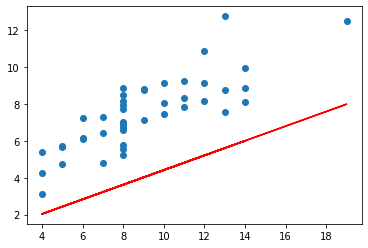

In [36]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# Cost function

Also named : Mean Squarred Error

In [37]:
def cost_function(x, y, theta):
  m = len(y)
  return 1/(2*m) * np.sum((model(x, theta) - y)**2)

In [38]:
cost_function(X, y, theta)

Y    6.741245
dtype: float64

# Gradient & Descent Gradient


In [39]:
def grad(X, y, theta):
  m = len(y)
  return 1/m * X.T.dot(model(X, theta) - y)

In [40]:
def descent_gradient(X, y, theta, learning_rate=0.01, n_iter=100):
  cost_history = np.zeros(n_iter)
  for i in range(0, n_iter):
    theta = theta - learning_rate * grad(X, y, theta)
    cost_history[i] = cost_function(X, y, theta)
  return theta, cost_history

# Normal Equation

Here we use normal equation to find theta without iterations

\begin{align*}
θ = (X^TX)^{-1}X^Ty
\end{align*}


In [51]:
def normal_equation(X, y):
  X_T = X.T
  theta = np.linalg.inv(X_T.dot(X)).dot(X_T).dot(y)
  return theta

# Train the model

## Predictions with theta of Gradient Descent

In [70]:
n_iterations = 2000
theta_dg, cost_history = descent_gradient(X, y, theta, n_iter=n_iterations, learning_rate=0.001)
theta_dg

array([[0.69997383],
       [0.98088998]])

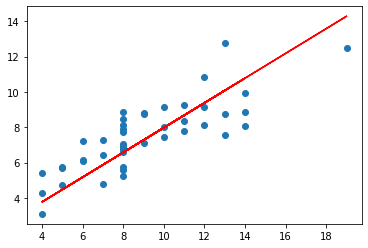

In [71]:
predictions_with_dg = model(X, theta_dg)
plt.scatter(x,y)
plt.plot(x, predictions_with_dg, c='r')

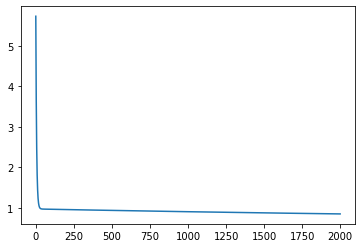

In [72]:
plt.plot(range(n_iterations), cost_history)

## Predictions with Normal Equation

Normal equation allow to find theta without iteration.
Here the formula:



In [52]:
theta_ne = normal_equation(X, y)
print(theta_ne)

[[0.49997727]
 [3.00065909]]


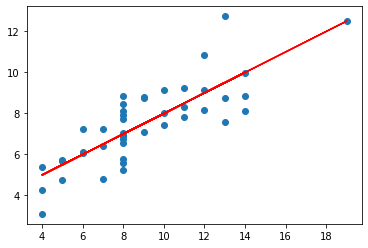

In [55]:
predictions_with_ne = model(X, theta_ne)
plt.scatter(x,y)
plt.plot(x, predictions_with_ne, c='r')

## coefficient of determination

We use coefficient of determination to evaluate the model performance. In the linear regression, we use the Least squares method

In [56]:
def coef_determination(y, pred):
  u = ((y - pred)**2).sum()
  v = ((y - y.mean())**2).sum()
  return 1 - u/v

In [73]:
print(f"Percentage with Normal Equation: {coef_determination(y, predictions_with_ne)}")
print(f"Percentage with Gradient Descent: {coef_determination(y, predictions_with_dg)}")

Percentage with Normal Equation: Y    0.666358
dtype: float64
Percentage with Gradient Descent: Y    0.546856
dtype: float64
